# 鸢尾花(KMeans)

In [1]:
# 导入鸢尾花数据集
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# 查看特征名称
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# 查看预估目标
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data = iris["data"]
type(data)

numpy.ndarray

In [6]:
data.shape

(150, 4)

In [7]:
target = iris["target"]
type(target)

numpy.ndarray

In [8]:
target.shape

(150,)

In [9]:
# 划分训练集和测试集（二八分）
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = \
    train_test_split(data,target,test_size=0.3)

data_train.shape

(105, 4)

In [10]:
target_train.shape

(105,)

In [11]:
data_test.shape

(45, 4)

In [12]:
target_test.shape

(45,)

In [13]:
import numpy as np

# K-means类封装
def kmeans(X, k, max_iters=1000): 
    n_samples, n_features = X.shape
    # 初始化聚类中心
    centers = X[np.random.choice(n_samples, k, replace=False)]
    # 训练迭代搞里头
    for _ in range(max_iters):
        # 计算每个样本点到各个聚类中心的欧式距离
        distances = np.sqrt(np.sum((X[:,np.newaxis]-centers)**2,axis=2))  
        # 分配样本到最近的聚类中心得到聚类标签
        labels = np.argmin(distances, axis=1)       
        # 更新聚类中心为每个聚类的均值
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])        
        # 如果聚类中心不再改变，提前结束迭代
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return labels, centers

In [14]:
# 使用K-means
k = 3
labels, centers = kmeans(data_train, k)

In [15]:
# 使用SSE评析聚类效果
predictions = np.array([centers[label] for label in labels])
sse = np.sum(np.linalg.norm(data_train - predictions, axis=1)**2)
print(f"SSE: {sse}")

SSE: 52.03541453634085


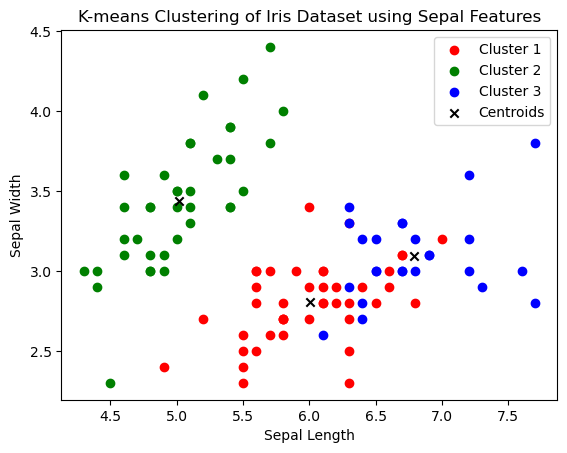

In [16]:
# 可视化一下看看划分得咋样

# 先看看使用萼片特征划分的结果
import matplotlib.pyplot as plt
plt.figure()
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(data_train[labels == i, 0], data_train[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset using Sepal Features')
plt.legend()
plt.show()

### 不是very good，簇和簇之间存在交错，下面用花瓣特征试试！

In [21]:
# 使用K-means
X = data_train[:, 2:]
p_labels, p_centers = kmeans(X, k)
# 使用SSE评析聚类效果
p_predictions = np.array([p_centers[label] for label in p_labels])
p_sse = np.sum(np.linalg.norm(X - p_predictions, axis=1)**2)
print(f"SSE: {p_sse}")

SSE: 19.68863862781955


### 发现比起使用萼片特征，使用花瓣特征的误差更小喔

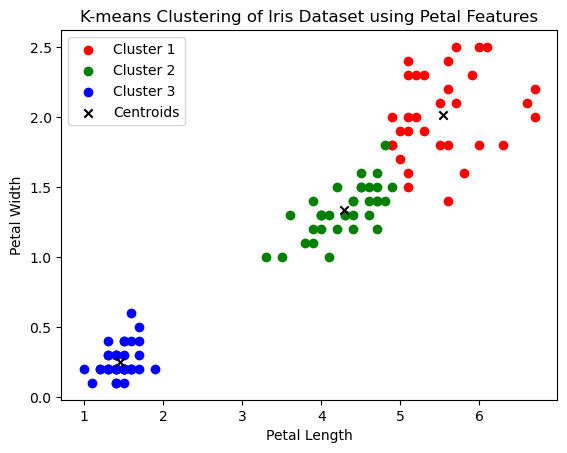

In [22]:
# 看看使用花瓣特征划分的结果
plt.figure()
colors = ['r', 'g', 'b']
for i in range(k):
    plt.scatter(X[p_labels == i, 0], X[p_labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
plt.scatter(p_centers[:, 0], p_centers[:, 1], c='black', marker='x', label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-means Clustering of Iris Dataset using Petal Features')
plt.legend()
plt.show()

可视化中也没有明显的交错了，很好的结果使我大脑旋转